In [32]:
 #Sentiment Analysis on Twitter Data

In [33]:
pip install tweepy pandas numpy matplotlib seaborn nltk scikit-learn wordcloud textblob vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Access Twitter Data using Tweepy

In [35]:
import tweepy

# Replace these with your credentials
api_key = "Your Key"
api_secret = "Your Key"
access_token = "Your Key"
access_token_secret = "Your Key"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [36]:
#Fetch Tweets

In [37]:
import tweepy

# Replace with your credentials
bearer_token = "Your Key"
client = tweepy.Client(bearer_token=bearer_token)

# Query for tweets
query = "mental health -is:retweet lang:en"  # v2 syntax: -is:retweet instead of -filter:retweets
tweets = client.search_recent_tweets(query=query, max_results=100, tweet_fields=["created_at", "author_id"])

# Collect tweet data
tweet_list = [[tweet.created_at, tweet.author_id, tweet.text] for tweet in tweets.data]
#print(tweet_list)

TooManyRequests: 429 Too Many Requests
Too Many Requests

In [ ]:
#Create a DataFrame

In [45]:
import pandas as pd

df = pd.DataFrame(tweet_list, columns=["Datetime", "User", "Tweet"])
df.head()

,Datetime,User,Tweet
0,2025-04-25 21:08:48+00:00,1713629740706275328,@its_The_Dr I think it will never happen. That...
1,2025-04-25 21:08:43+00:00,1499180475734282243,@RWaschychyn @NotMeThisTimeNo @mcbethr12 @Chan...
2,2025-04-25 21:08:42+00:00,158484128,🧠💬Let’s talk mental health! \nJoin us THIS Sat...
3,2025-04-25 21:08:36+00:00,982906080,"As a mental health counselor, I'll hop on thi..."
4,2025-04-25 21:08:25+00:00,849640727596466177,@OliLondonTV She needs some mental health


In [ ]:
#Clean the Tweets

In [47]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#', '', text)        # remove hashtags symbol
    text = re.sub(r'\W', ' ', text)      # remove special characters
    text = text.lower()
    text = " ".join(word for word in text.split() if word not in stop)
    return text

df['Clean_Tweet'] = df['Tweet'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Sentiment Analysis using TextBlob or Vader

In [49]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Clean_Tweet'].apply(get_sentiment)

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Clean_Tweet'].apply(vader_sentiment)


In [53]:
#Visualize the result

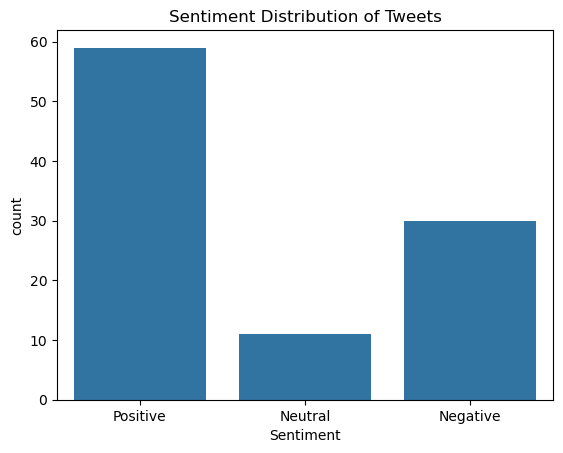

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution of Tweets")
plt.show()


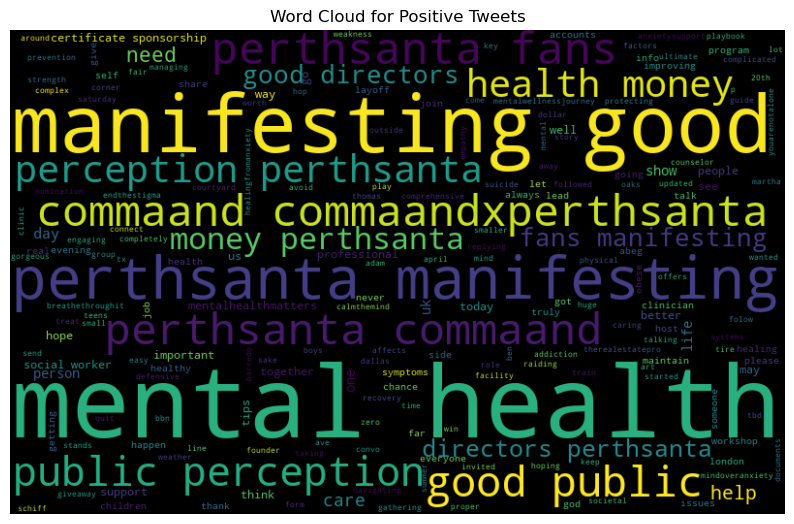

In [57]:
from wordcloud import WordCloud

all_words = " ".join([text for text in df[df['Sentiment']=='Positive']['Clean_Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Positive Tweets")
plt.show()


In [59]:
#Export result

In [61]:
df.to_csv("twitter_sentiment_analysis.csv", index=False)

In [63]:
#Train/Test Split

In [65]:
df['Sentiment_Label'] = df['Sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

from sklearn.model_selection import train_test_split

X = df['Clean_Tweet']
y = df['Sentiment_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
#Convert text to vector

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [71]:
#Train a Classifier (try Logistic regression and SVM)

In [75]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [77]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_vec, y_train)


C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [79]:
#Evaluate the model

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          -1       0.80      0.57      0.67         7
           0       0.00      0.00      0.00         2
           1       0.67      0.91      0.77        11

    accuracy                           0.70        20
   macro avg       0.49      0.49      0.48        20
weighted avg       0.65      0.70      0.66        20



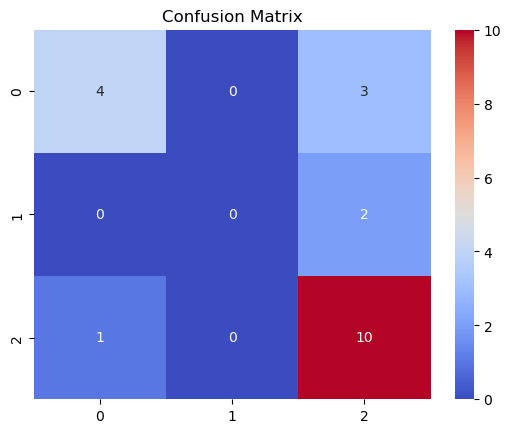

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()


In [83]:
#Predict on new tweets

In [85]:
new_tweets = ["I love this!", "This is awful.", "It's okay, I guess."]
new_clean = [clean_text(tweet) for tweet in new_tweets]
new_vec = vectorizer.transform(new_clean)
model.predict(new_vec)


array([1, 1, 1], dtype=int64)